<a href="https://colab.research.google.com/github/edineim/machine_learning/blob/main/L12_decision_trees_(pr%C3%A1tica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Máquina/Atividades/EX-L05_manual-pipeline/date.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Nascimento,MP,Gols,Assis.,G-PB,PB,PT,CrtsA,CrtV,Pos.
0,1,1990,29,8,7,8,0,1,7,1,AT
1,2,1993,28,12,5,10,2,2,3,0,AT
2,3,1996,28,8,8,8,0,0,3,0,AT
3,4,1991,28,6,3,5,1,1,9,2,AT
4,5,1990,28,8,2,5,3,3,4,0,AT


In [ ]:
d = {'G': 0,'ZG': 1,'LT': 2,'LT,AT': 3,'AT': 4,'AT,LT': 5}

df['Pos.'] = df['Pos.'].map(d)

X = df.iloc[:, 1:10].values

y = df['Pos.'].values

X = df.iloc[:, :2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

In [ ]:
pipe = Pipeline([
        ('normalizador', StandardScaler()),
        ('redutor_dim', PCA()),
        ('classificador', DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('normalizador', StandardScaler()), ('redutor_dim', PCA()),
                ('classificador',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                        random_state=1))])

Usando PCA

In [ ]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.5344827586206896

In [ ]:
y_train_pred = pipe.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.6331877729257642

Realizando a busca pelo melhor hiperparametro

In [ ]:
param_grid = {
    'redutor_dim__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classificador__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__ccp_alpha': [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid= param_grid, scoring='accuracy' )

In [ ]:
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'classificador__ccp_alpha': 0.1, 'classificador__criterion': 'entropy', 'classificador__max_depth': 4, 'redutor_dim__n_components': 2}
0.681159420289855


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2560 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py",

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'classificador__ccp_alpha': 0.1, 'classificador__criterion': 'entropy', 'classificador__max_depth': 4, 'redutor_dim__n_components': 2}
0.681159420289855


In [ ]:
clf= grid.best_estimator_
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5862068965517241

Realizando o Predict em uma unica amostra

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(58, 2)
(58,)
(2,)
()
(1, 2)
(1,)


In [ ]:
y_test1_pred  = grid.predict(X_test1)

y_test1_pred

array([2])

In [ ]:
accuracy_score(y_test1, y_test1_pred)

0.0

In [ ]:
X_test1

array([[  86, 1992]])

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test2 = X_test[2,:]
y_test2 = y_test[2]

print(np.shape(X_test2))
print(np.shape(y_test2))

X_test2 = np.reshape(X_test2,(1,-1))
y_test2 = np.reshape(y_test2,(1))

print(np.shape(X_test2))
print(np.shape(y_test2))

(58, 2)
(58,)
(2,)
()
(1, 2)
(1,)


In [ ]:
X_test2

array([[ 228, 1997]])

In [ ]:
y_test2_pred  = grid.predict(X_test2)

y_test2_pred

array([1])

In [ ]:
accuracy_score(y_test2, y_test2_pred)

1.0

In [ ]:
X_test2

array([[ 228, 1997]])

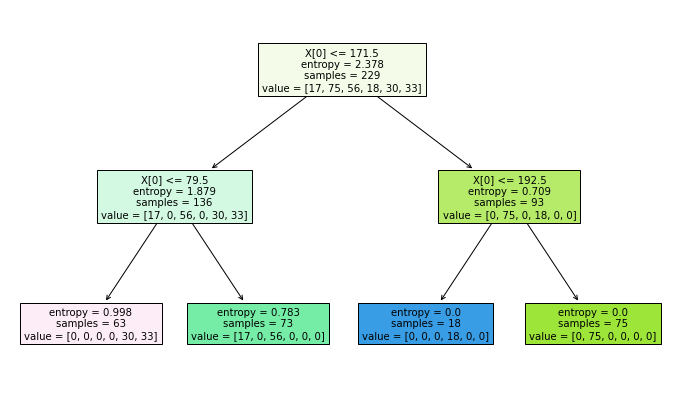

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtc.fit(X_train, y_train)

plt.figure(figsize=(12, 7))

plot_tree(dtc, filled=True) 

plt.show()